In [1]:
import numpy as np
import pandas as pd

In [2]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [3]:
data = pd.read_csv('../input/heart-disease-dataset/heart.csv')

In [4]:
data

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0   0     3       0  
2         0   0     3       0  
3         2   1     3       0  
4         1   3     2       0  
...     ...  ..   ...     ...  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  

[1025 rows x 14 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


# EDA-Exploratory Data Analysis

Boxplots for each numeric variable and a correlation heatmap for the dataset

In [6]:
numeric_features= ['age', 'sex', 'trestbps', 'chol', 'thalach', 'oldpeak', 'slope', 'ca']

eda_df= data.loc[:, numeric_features].copy()

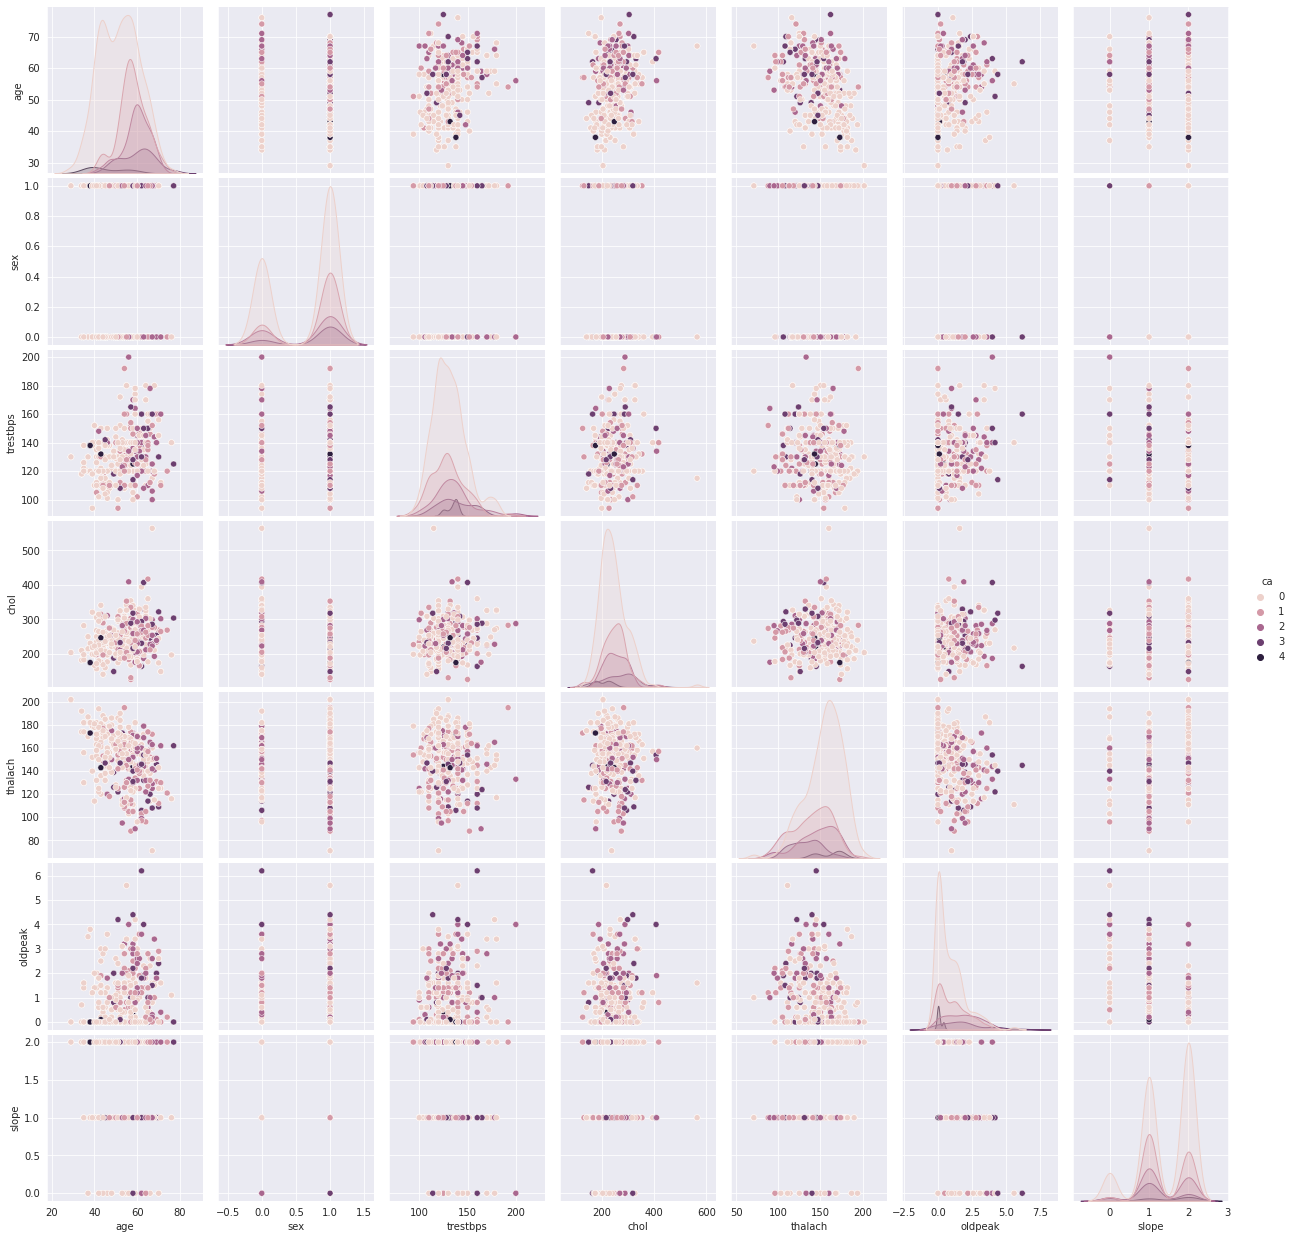

In [7]:
sns.pairplot(eda_df.iloc[:,0:8],hue="ca")
plt.show()

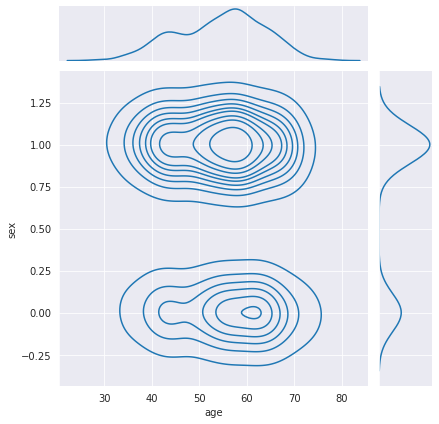

In [8]:
sns.jointplot(x=eda_df.age, y=eda_df.sex, data=eda_df, kind="kde");

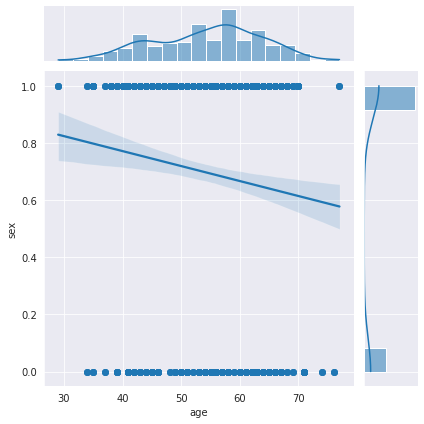

In [9]:
sns.jointplot(x=eda_df.age, y=eda_df.sex, data=eda_df, kind="reg");

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

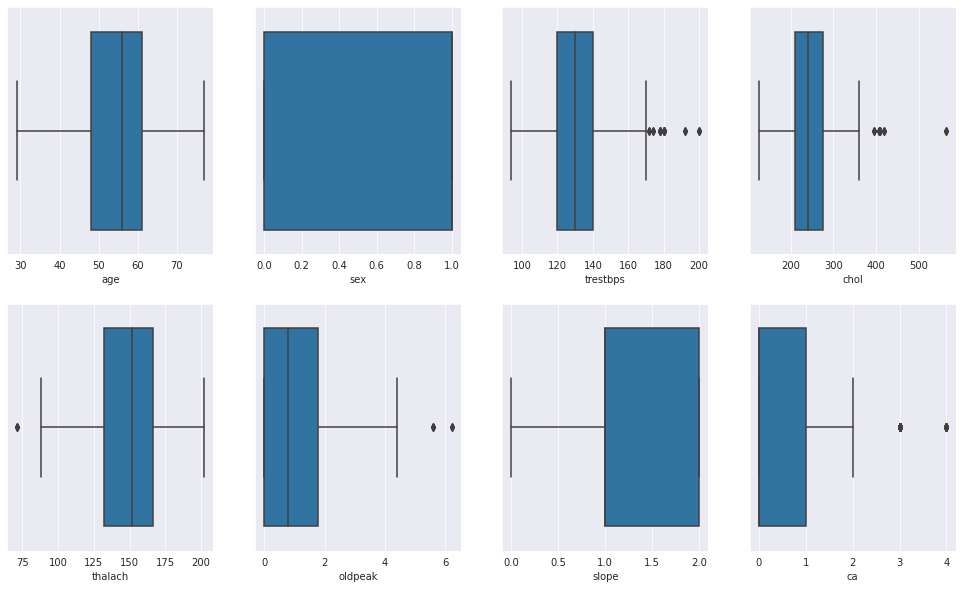

In [10]:
plt.figure(figsize=(17, 10))

for i in range(len(eda_df.columns)):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(eda_df[eda_df.columns[i]])

plt.show()

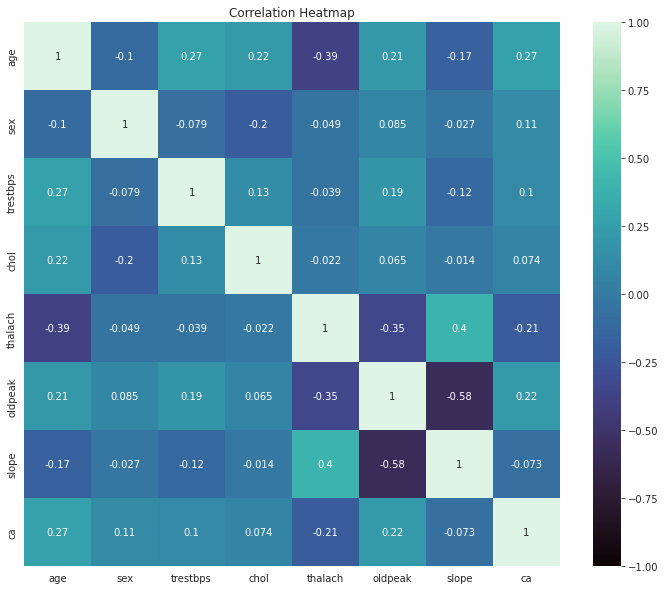

In [11]:
corr = eda_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title("Correlation Heatmap")
plt.show()


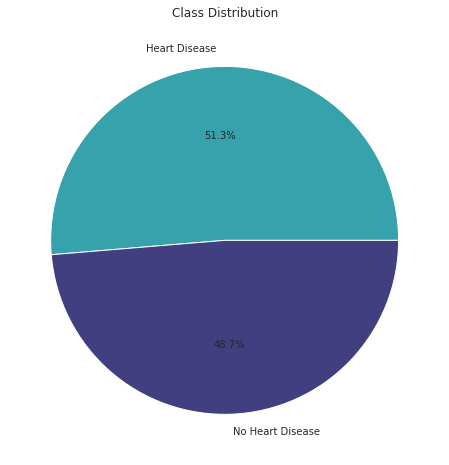

In [12]:
plt.figure(figsize=(8, 8))
plt.pie(data['target'].value_counts(), labels=["Heart Disease", "No Heart Disease"], autopct='%.1f%%', colors=['#36a2ac', '#413f80'])
plt.title("Class Distribution")
plt.show()

# Preprocessing

In [13]:
def onehot_enc(df,column_dict):
    df=df.copy()
    for column, prefix in column_dict.items():
        dummies=pd.get_dummies(df[column], prefix=prefix)
        df=pd.concat([df,dummies], axis=1)
        df=df.drop(column, axis=1)
    return df

In [14]:
def preproc_inputs(df, scaler):
    df=df.copy()
    
    #one-hot encoding the nominal features
    nominal_features=['cp','slope','thal']
    df = onehot_enc(df, dict(zip(nominal_features, ['CP', 'SL', 'TH'])))
    
    #splitting df into X and y
    y=df['target'].copy()
    X=df.drop('target', axis=1).copy()
    
    #scaling X
    X=pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
    
    return X,y

In [15]:
#X, y = preproc_inputs(data, StandardScaler())
#X

In [16]:
#y

In [17]:
#X, y = preproc_inputs(data, RobustScaler())
#X


In [18]:
#y

In [19]:
X, y = preproc_inputs(data, MinMaxScaler())
X

age  sex  trestbps      chol  fbs  restecg   thalach  exang  \
0     0.479167  1.0  0.292453  0.196347  0.0      0.5  0.740458    0.0   
1     0.500000  1.0  0.433962  0.175799  1.0      0.0  0.641221    1.0   
2     0.854167  1.0  0.481132  0.109589  0.0      0.5  0.412214    1.0   
3     0.666667  1.0  0.509434  0.175799  0.0      0.5  0.687023    0.0   
4     0.687500  0.0  0.415094  0.383562  1.0      0.5  0.267176    0.0   
...        ...  ...       ...       ...  ...      ...       ...    ...   
1020  0.625000  1.0  0.433962  0.216895  0.0      0.5  0.709924    1.0   
1021  0.645833  1.0  0.292453  0.301370  0.0      0.0  0.534351    1.0   
1022  0.375000  1.0  0.150943  0.340183  0.0      0.0  0.358779    1.0   
1023  0.437500  0.0  0.150943  0.292237  0.0      0.0  0.671756    0.0   
1024  0.520833  1.0  0.245283  0.141553  0.0      0.5  0.320611    0.0   

       oldpeak    ca  ...  CP_1  CP_2  CP_3  SL_0  SL_1  SL_2  TH_0  TH_1  \
0     0.161290  0.50  ...   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   
1     0.500000  0.00  ...   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
2     0.419355  0.00  ...   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
3     0.000000  0.25  ...   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   
4     0.306452  0.75  ...   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
...        ...   ...  ...   ...   ...   ...   ...   ...   ...   ...   ...   
1020  0.000000  0.00  ...   1.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   
1021  0.451613  0.25  ...   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
1022  0.161290  0.25  ...   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
1023  0.000000  0.00  ...   0.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   
1024  0.225806  0.25  ...   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   

      TH_2  TH_3  
0      0.0   1.0  
1      0.0   1.0  
2      0.0   1.0  
3      0.0   1.0  
4      1.0   0.0  
...    ...   ...  
1020   1.0   0.0  
1021   0.0   1.0  
1022   1.0   0.0  
1023   1.0   0.0  
1024   0.0   1.0  

[1025 rows x 21 columns]

In [20]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1020    1
1021    0
1022    0
1023    1
1024    0
Name: target, Length: 1025, dtype: int64

# Training

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [22]:
#lr_model= LogisticRegression()
#lr_model.fit(X_train, y_train)

#print("Logistic Regression Accuracy: {:.2f}".format(lr_model.score(X_test, y_test)*100))

In [23]:
#svm_model=SVC()
#svm_model.fit(X_train, y_train)

#print("Support Vector Machine Accuracy: {:.2f}".format(svm_model.score(X_test, y_test)*100))

In [24]:
nn_model=MLPClassifier()
nn_model.fit(X_train, y_train)

print("Neural Network Accuracy: {:.2f}".format(nn_model.score(X_test, y_test)*100))

Neural Network Accuracy: 94.15


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [25]:
plot_confusion_matrix(clf, X_test, y_test)  
plt.show()

NameError: name 'plot_confusion_matrix' is not defined